# Hamiltonian_Monte_Carlo

# In the following, we illustrate the generation of samples within a polytope, according to a target Gaussian distribution

In [2]:
# http://www.open3d.org/docs/release/tutorial/Basic/pointcloud.html
# http://www.open3d.org/docs/release/tutorial/Basic/working_with_numpy.html
# http://www.open3d.org/docs/0.8.0/tutorial/Basic/visualization.html
        
import os
import numpy as np
import open3d as o3d
from open3d import JVisualizer
from SBL.SBL_pytools import SBL_pytools as sblpyt



# enclosing cube
def line_set_cube(a):
    points = [[-a, -a, -a], [a, -a, -a], [-a, a, -a],  [a, a, -a],  [-a, -a, a],  [a, -a, a], [-a, a, a], [a,a,a] ]
    lines = [[0, 1], [0, 2], [1, 3], [2, 3], [4, 5], [4, 6], [5, 7], [6, 7], [0, 4], [1, 5], [2, 6], [3, 7]]
    colors = [[1, 0, 0] for i in range(len(lines))]
    line_set = o3d.geometry.LineSet()
    
    line_set.points = o3d.utility.Vector3dVector(points)
    line_set.lines = o3d.utility.Vector2iVector(lines)
    line_set.colors = o3d.utility.Vector3dVector(colors)
    return line_set

# enclosing cube
def line_set_stdsimplex(a):
    points = [[0,0,0], [a, 0, 0], [0, a, 0],  [0,0,a] ]
    lines = [[0, 1], [0, 2],[0,3],[1,2],[1,3],[2,3]]
    colors = [[1, 0, 0] for i in range(len(lines))]
    line_set = o3d.geometry.LineSet()
    
    line_set.points = o3d.utility.Vector3dVector(points)
    line_set.lines = o3d.utility.Vector2iVector(lines)
    line_set.colors = o3d.utility.Vector3dVector(colors)
    return line_set

def process_case(model_name, dimension, sigma, num_samples,   starting_point_file=None):
    A_file = "data/%s_dim%s_A.csv" % (model_name, dimension)
    b_file = "data/%s_dim%s_b.csv"  % (model_name, dimension)
     
    ofname = "%s-dim%s-numsamples%s.xyz" % (model_name, dimension, num_samples)
    
    if (not os.path.isfile(A_file)) or (not os.path.isfile(b_file)):
        print("Check A and b files; exiting"); return;
        
    # generate the samples
    cmd = "sbl-HMC-polytope-sampler.exe -A %s -b %s -n %s -o %s" % (A_file, b_file, num_samples, ofname)
    cmd += " --sigma %s" % sigma
    if starting_point_file:
        cmd += " --starting_pt_file %s" % starting_point_file
    
    print(("Running %s" % cmd))
    os.system(cmd)
    print("Done")
    
    if model_name == "cube":
        line_set = line_set_cube(1)
    elif model_name == "stdsimplex":
        line_set = line_set_stdsimplex(1)
   
    # generate the samples and directly visualize them
    if dimension == 3:
        pcd = o3d.io.read_point_cloud(ofname)
        #print(pcd)
        #print(np.asarray(pcd.points))
        o3d.visualization.draw_geometries([pcd,line_set])
    # generate the samples and pick the first three coordinates
    elif dimension > 3:
        data = np.loadtxt(ofname, usecols=[0,1,2])
        #print(data)
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(data)
        o3d.visualization.draw_geometries([pcd,line_set])

# Test in 3D: cube, standard simplex

## The following call opens an interactive viewwer to inspect n=10000 samples in the 3D cube $[-1,1]^3$
To illustrate the role of the Gaussian width, we  successively process two cases, namely $\sigma = 1$, and $\sigma = 0.1$. Static pictures also feature the enclosing cube.

In [7]:
 process_case("cube", 3, 1, 10000) 

Running sbl-HMC-polytope-sampler.exe -A data/cube_dim3_A.csv -b data/cube_dim3_b.csv -n 10000 -o cube-dim3-numsamples10000.xyz --sigma 1
Done


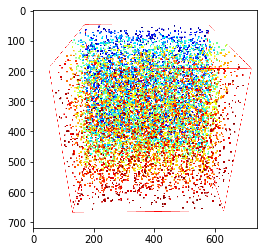

In [9]:
sblpyt.show_image("fig/cube-dim3-sig1-n10000.png")

In [5]:
process_case("cube", 3, 0.1, 10000)

Running sbl-HMC-polytope-sampler.exe -A data/cube_dim3_A.csv -b data/cube_dim3_b.csv -n 10000 -o cube-dim3-numsamples10000.xyz --sigma 0.1
Done


## For the sake of visualization, here is a static picture of these samples

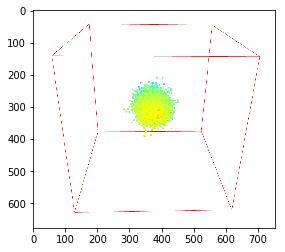

In [16]:
sblpyt.show_image("fig/cube-dim3-sig0dot1-n10000.png")

## We now process the standard simplex $\{ x_i\geq 0, \sum_i x_i \leq 1\}$
To illustrate the role of the Gaussian width, we  successively process two cases, namely $\sigma = 1$, and $\sigma = 0.1$
Static pictures also feature the enclosing simplex.  

In [43]:
process_case("stdsimplex", 3, 1, 10000, "data/stdsimplex_dim3_p.csv")


Running sbl-HMC-polytope-sampler.exe -A data/stdsimplex_dim3_A.csv -b data/stdsimplex_dim3_b.csv -n 10000 -o stdsimplex-dim3-numsamples10000.xyz --sigma 1 --starting_pt_file data/stdsimplex_dim3_p.csv
Done


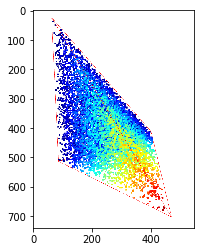

In [11]:
sblpyt.show_image("fig/stdsimplex-dim3-sig1-n10000.png")

In [12]:
process_case("stdsimplex", 3, 0.1, 10000, "data/stdsimplex_dim3_p.csv")

Running sbl-HMC-polytope-sampler.exe -A data/stdsimplex_dim3_A.csv -b data/stdsimplex_dim3_b.csv -n 10000 -o stdsimplex-dim3-numsamples10000.xyz --sigma 0.1 --starting_pt_file data/stdsimplex_dim3_p.csv
Done


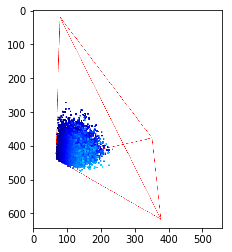

In [17]:
sblpyt.show_image("fig/stdsimplex-dim3-sig0dot1-n10000.png")

 # Tests in higher dimension: cube in dimension 10
 * The first call generatessamples, and opens an interactive coordinate for the projection of the generated samples in 3D
 * The static figure is a capture of the latter

In [32]:
 process_case("cube", 10, 1, 10000) 

Running sbl-HMC-polytope-sampler.exe -A data/cube_dim10_A.csv -b data/cube_dim10_b.csv -n 10000 -o cube-dim10-numsamples10000.xyz --sigma 1
Done


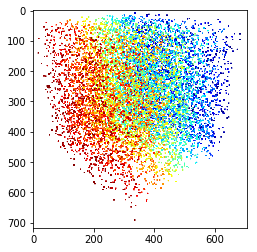

In [15]:
 sblpyt.show_image("fig/cube-dim10-sig1-n10000.png")
